## **Decision Tree Classification**

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

Frankly, you can say it IF_ELSE Generator

For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

<img src="https://miro.medium.com/max/673/1*MCn6_qX_KYNwHaTSOqqbSA.png">



## **Applications of Decision trees in real life :**

1.    Biomedical Engineering (decision trees for identifying features to be used in implantable devices).
2.    Financial analysis (Customer Satisfaction with a product or service).
3.    Astronomy (classify galaxies).
4.    System Control.
5.    Manufacturing and Production (Quality control, Semiconductor manufacturing, etc).
6.    Medicines (diagnosis, cardiology, psychiatry).
7.    Physics (Particle detection).

## **Geting Started with Decision Tree Classification**

In [24]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn import preprocessing

## **Loading Dataset**

Read .csv data into a Dataframe

## **About this file**
This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

***Fields description follow:***

**pregnant** = Number of times pregnant

**glucose** = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**bp** = Diastolic blood pressure (mm Hg)

**skin** = Triceps skin fold thickness (mm)

**insulin** = 2-Hour serum insulin (mu U/ml)

**bmi** = Body mass index (weight in kg/(height in m)^2)

**pedigree** = Diabetes pedigree function

**age** = Age (years)

**label** = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [8]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [9]:
# load dataset
pima = pd.read_csv("/content/drive/My Drive/Datasets/pima-indians-diabetes.csv", header = None, names = col_names)

pima.head(8)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [26]:
pima.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## **Features Extraction**

Extracting features and splitting data into test and train.

In [12]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X,y)

## **Training the Model**

We are using Decision Tree Classification model as imported from sklearn.tree library and then it's being trained on features and target variables

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## **Evaluation**

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.6510416666666666
Confusion Matrix
 [[90 39]
 [28 35]]


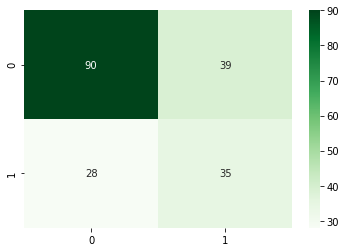

In [18]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens')

## **Visualizing Decision Trees**



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


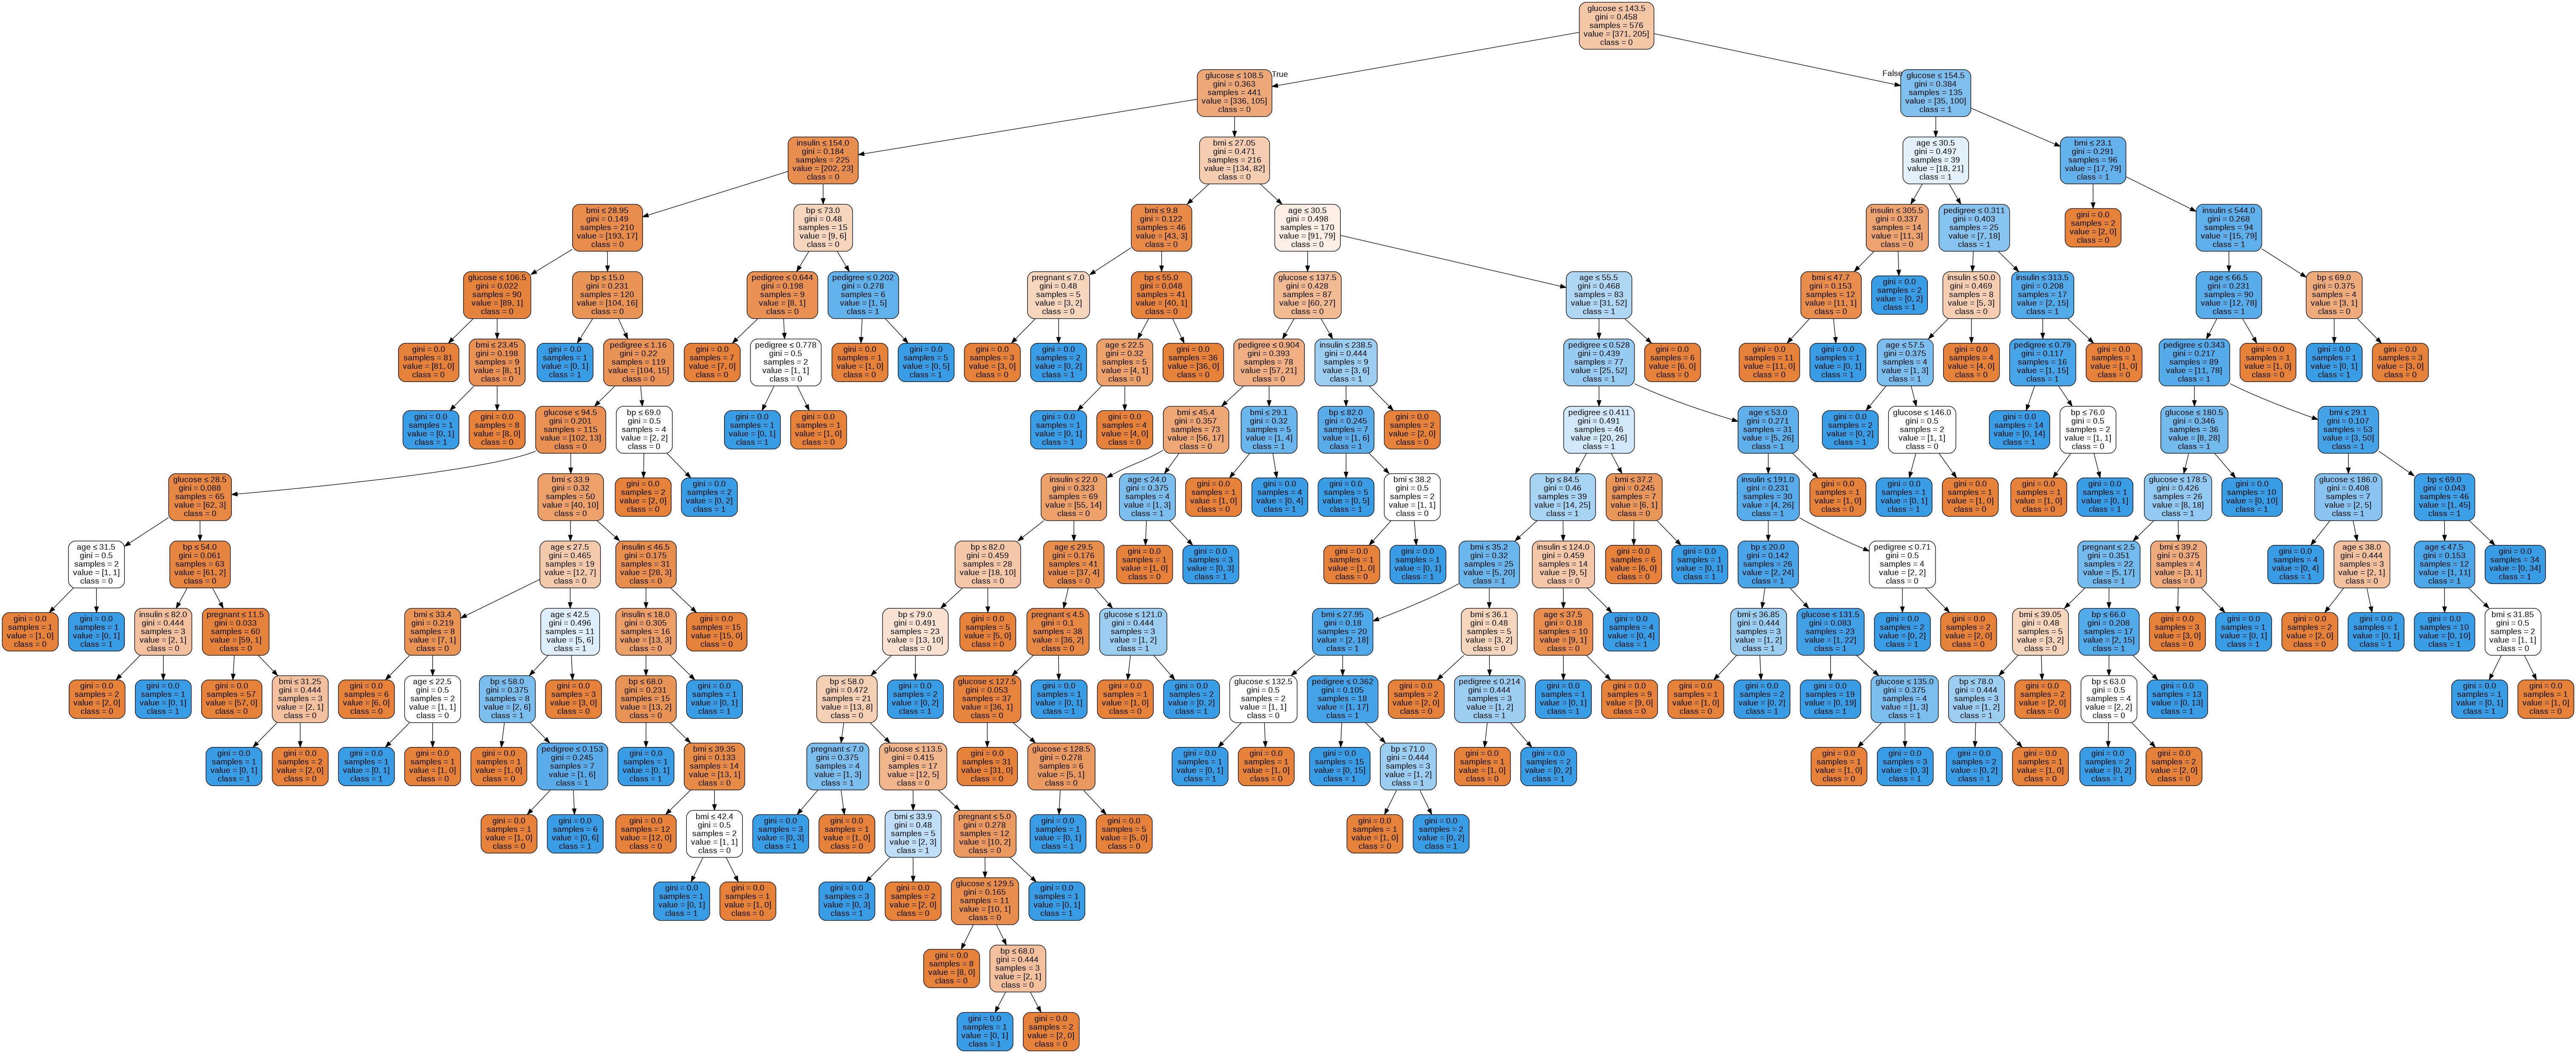

In [19]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())